In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
money = pd.read_csv('./data/money.csv', header=None)
amount_growing = pd.read_csv('./data/amount_growing.csv', header=None)
energy_spent = pd.read_csv('./data/energy_spent.csv', header=None)
stored = pd.read_csv('./data/stored.csv', header=None)
purchased = pd.read_csv('./data/purchased.csv', header=None)


In [29]:
time_energy_penalty = pd.read_csv('./data/time_energy.csv', header=None)

In [14]:
purchased = purchased.rename(columns={0:"action",1:"on",2:"day",3:"crop",4:"amount"})

In [20]:
purchased = purchased.drop(columns=["action", "on"])
purchased

,day,crop,amount
0,0,blue_jaz],0
1,0,cauliflower],0
2,0,green_bean],0
3,0,kale],0
4,0,parsnip],25
...,...,...,...
275,27,potato],0
276,27,rhubarb],0
277,27,strawberry],0
278,27,tulip],0


In [18]:
energy_spent = energy_spent.drop(columns=[0,1,2])
energy_spent = energy_spent.rename(columns={3: "day", 4: "amount"})

In [ ]:
amount_growing = amount_growing.drop(columns=[0,1,2])
amount_growing = amount_growing.rename(columns={3: "day", 4: "amount"})

In [28]:
stored = stored.drop(columns=[0,1])
stored = stored.rename(columns={2:"day",3:"crop",4:"amount"})
stored

,day,crop,amount
0,0,blue_jaz],0
1,0,cauliflower],0
2,0,green_bean],0
3,0,kale],0
4,0,parsnip],5
...,...,...,...
275,27,potato],0
276,27,rhubarb],0
277,27,strawberry],0
278,27,tulip],0


In [31]:
time_energy_penalty = time_energy_penalty.drop(columns=[1])
time_energy_penalty = time_energy_penalty.rename(columns={0:"action", 2:"day",3:"amount"})
time_energy_penalty

,action,day,amount
0,time_spent,0,364.000000
1,energy_penalty,0,0.000000
2,time_spent,1,315.000000
3,energy_penalty,1,0.000000
4,time_spent,2,310.000000
5,energy_penalty,2,0.000000
6,time_spent,3,310.000000
7,energy_penalty,3,0.000000
8,time_spent,4,578.000000
9,energy_penalty,4,0.000000


In [ ]:
time_energy_penalty
time_energy_penalty.set_value('energy_penalty', 'x', 10)

In [33]:
money = money.drop(columns=[0,1])
money = money.rename(columns={2: "day", 3: "amount"})
money

,day,amount
0,0,0
1,1,0
2,2,0
3,3,0
4,4,25
5,5,0
6,6,0
7,7,0
8,8,30
9,9,30


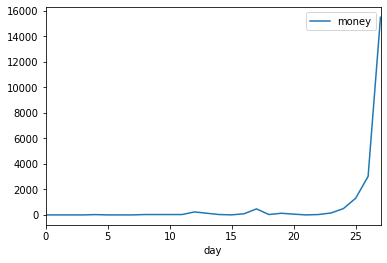

In [120]:
money.plot(x="day", y='amount', label='money')

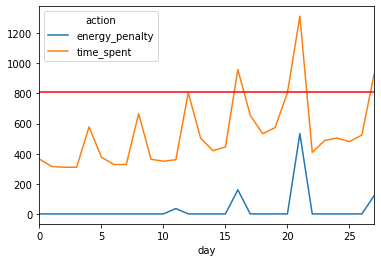

In [41]:
df = time_energy_penalty.pivot(index='day', columns='action', values='amount')

ax = df.plot()
ax.axhline(y=810, color='r')

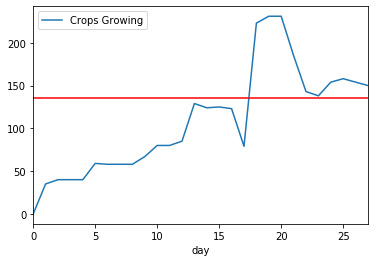

In [45]:
ax = amount_growing.plot(x="day", y='amount', label='Crops Growing')
ax.axhline(y=135, color='r')

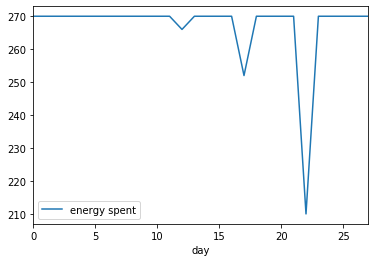

In [46]:
energy_spent.plot(x="day", y='amount', label='energy spent')

In [71]:
crops= [
    'blue_jaz]',
    'cauliflower]',
    'green_bean]',
    'kale]',
    'parsnip]',
    'potato]',
    'rhubarb]',
    'strawberry]',
    'tulip]',
    'unmilled_rice]'
]
values = []
for crop in crops:
    values.append(purchased.loc[purchased['crop'] == crop,['amount']].sum(axis=0).values[0])


In [72]:
values


[0, 0, 0, 129, 513, 11, 1, 6, 17, 0]

In [78]:
crops= [
    'blue_jaz',
    'cauliflower',
    'green_bean',
    'kale',
    'parsnip',
    'potato',
    'rhubarb',
    'strawberry',
    'tulip',
    'unmilled_rice'
]
# Calling DataFrame constructor on list 
# with indices and columns specified 
purchased_total = pd.DataFrame(list(zip(crops, values)),
                                              columns =['crop', 'purchased'])



In [84]:
purchased_total = purchased_total.set_index('crop')


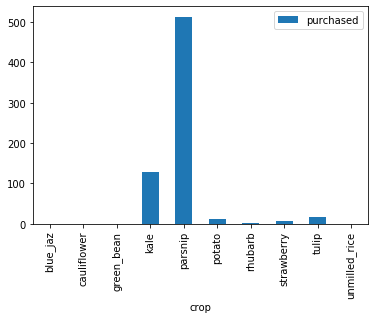

In [85]:
purchased_total.plot.bar()


In [87]:
soil_prepped = pd.read_csv('./data/soil_prepped.csv', header=None)

In [89]:
soil_prepped = soil_prepped.drop(columns=[0,1,2,4])
soil_prepped = soil_prepped.rename(columns={3: "day", 5: "coordinate", 6: "value"})
soil_prepped

,day,coordinate,value
0,0,"(0,0)",1
1,0,"(0,1)",0
2,0,"(0,2)",0
3,0,"(0,3)",1
4,0,"(0,4)",1
...,...,...,...
23543,27,"(28,24)",0
23544,27,"(28,25)",0
23545,27,"(28,26)",0
23546,27,"(28,27)",0


In [91]:
df = soil_prepped.set_index(['day', 'coordinate'])
df

value
day coordinate       
0   (0,0)           1
    (0,1)           0
    (0,2)           0
    (0,3)           1
    (0,4)           1
...               ...
27  (28,24)         0
    (28,25)         0
    (28,26)         0
    (28,27)         0
    (28,28)         0

[23548 rows x 1 columns]

In [93]:
prepped_df = df.sum(level="day")


In [96]:
prepped_df = prepped_df.rename(columns={"value": "total soil prepped"})


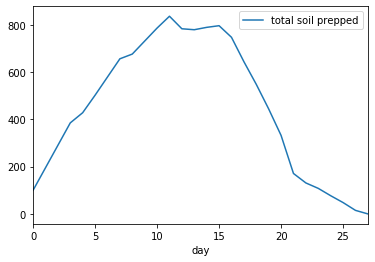

In [97]:
prepped_df.plot(label="")


In [116]:
planted = pd.read_csv('./data/planted.csv', header=None)


In [117]:
planted = planted.drop(columns=[0,1])
planted = planted.rename(columns={2: 'day', 3: 'crop', 4:'amount'})
planted

,day,crop,amount
0,0,blue_jaz],0
1,0,cauliflower],0
2,0,green_bean],0
3,0,kale],0
4,0,parsnip],35
...,...,...,...
275,27,potato],0
276,27,rhubarb],0
277,27,strawberry],0
278,27,tulip],0


In [118]:
planted = planted[planted.crop != 'blue_jaz]']
planted = planted[planted.crop != 'cauliflower]']
planted = planted[planted.crop != 'green_bean]']
planted = planted[planted.crop != 'unmilled_rice]']
planted

,day,crop,amount
3,0,kale],0
4,0,parsnip],35
5,0,potato],0
6,0,rhubarb],0
7,0,strawberry],0
...,...,...,...
274,27,parsnip],0
275,27,potato],0
276,27,rhubarb],0
277,27,strawberry],0


In [101]:
planted = planted.set_index(['day', 'crop'])
planted

amount
day crop                  
0   blue_jaz]            0
    cauliflower]         0
    green_bean]          0
    kale]                0
    parsnip]            35
...                    ...
27  potato]              0
    rhubarb]             0
    strawberry]          0
    tulip]               0
    unmilled_rice]       0

[280 rows x 1 columns]

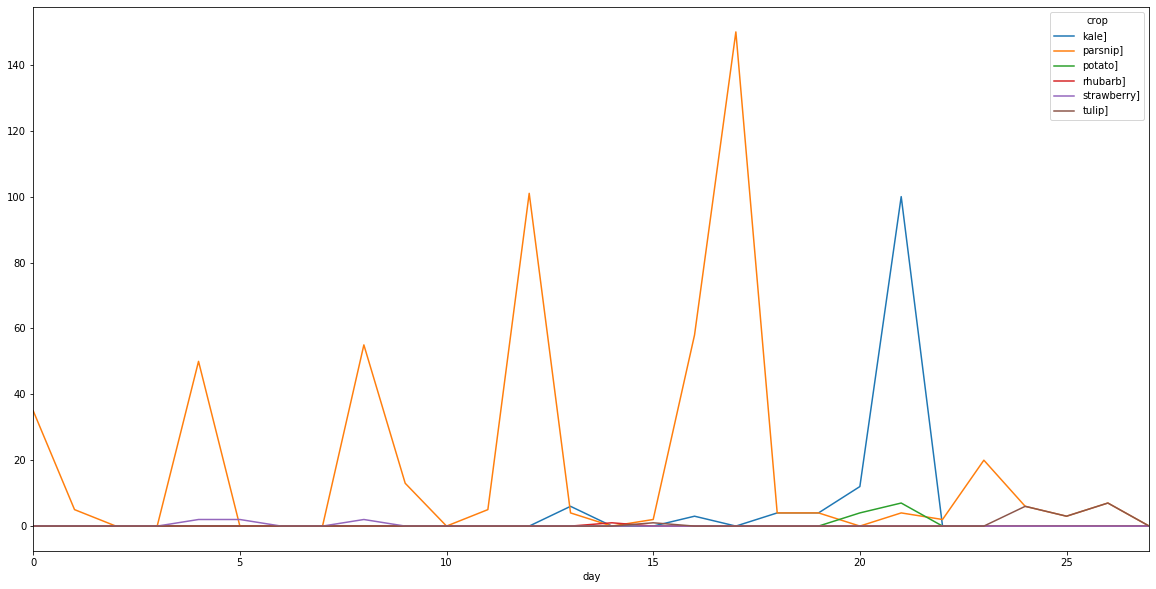

In [119]:
planted.reset_index().pivot('day','crop','amount').plot(figsize=(20,10))


In [121]:
stored

,day,crop,amount
0,0,blue_jaz],0
1,0,cauliflower],0
2,0,green_bean],0
3,0,kale],0
4,0,parsnip],5
...,...,...,...
275,27,potato],0
276,27,rhubarb],0
277,27,strawberry],0
278,27,tulip],0


In [122]:
stored = stored.set_index(['day', 'crop'])
stored

amount
day crop                  
0   blue_jaz]            0
    cauliflower]         0
    green_bean]          0
    kale]                0
    parsnip]             5
...                    ...
27  potato]              0
    rhubarb]             0
    strawberry]          0
    tulip]               0
    unmilled_rice]       0

[280 rows x 1 columns]

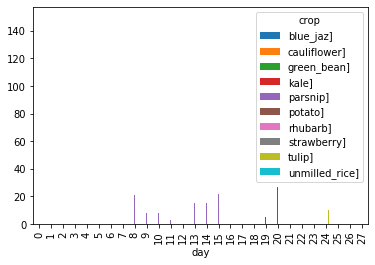

In [124]:
stored.reset_index().pivot('day','crop','amount').plot.bar()

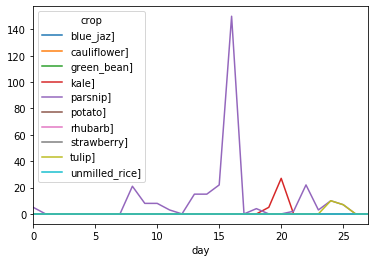

In [127]:
stored.reset_index().pivot('day','crop','amount').plot()

In [129]:
values

[0, 0, 0, 129, 528, 11, 1, 6, 17, 0]

In [133]:
purchased

,day,crop,amount
0,0,blue_jaz],0
1,0,cauliflower],0
2,0,green_bean],0
3,0,kale],0
4,0,parsnip],25
...,...,...,...
275,27,potato],0
276,27,rhubarb],0
277,27,strawberry],0
278,27,tulip],0


In [134]:
purchased_spec = purchased.set_index(['day', 'crop'])

In [135]:
purchased_spec

amount
day crop                  
0   blue_jaz]            0
    cauliflower]         0
    green_bean]          0
    kale]                0
    parsnip]            25
...                    ...
27  potato]              0
    rhubarb]             0
    strawberry]          0
    tulip]               0
    unmilled_rice]       0

[280 rows x 1 columns]

In [136]:
values = []
for day in range(28):
    values.append(purchased.loc[purchased['day'] == day,['amount']].sum(axis=0).values[0])

In [137]:
values

[25,
 0,
 0,
 0,
 52,
 2,
 0,
 0,
 78,
 0,
 0,
 0,
 98,
 25,
 1,
 10,
 189,
 0,
 12,
 9,
 38,
 86,
 22,
 1,
 29,
 0,
 0,
 0]

In [138]:
purchased_day = pd.DataFrame(list(zip(range(28), values)),
                                              columns =['day', 'amount_purchased'])

In [140]:
purchased_day = purchased_day.set_index('day')

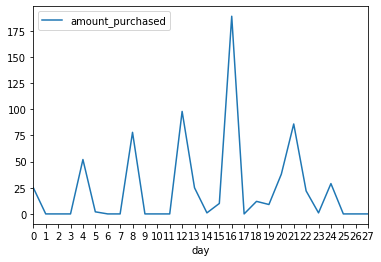

In [143]:
ax = purchased_day.plot()
ax.set_xticks(range(28))

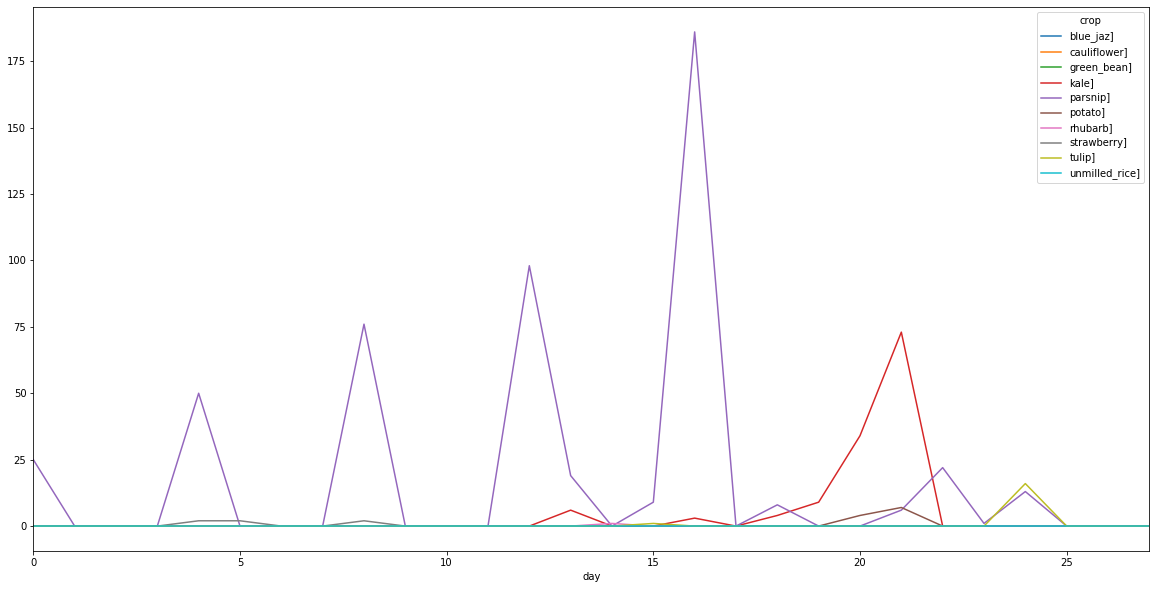

In [145]:
purchased.reset_index().pivot('day','crop','amount').plot(figsize=(20,10))